In [ ]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
%matplotlib inline


# 1.) reading data from csv

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# 3.1)univerate analysis

In [ ]:
#statistical analysis
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


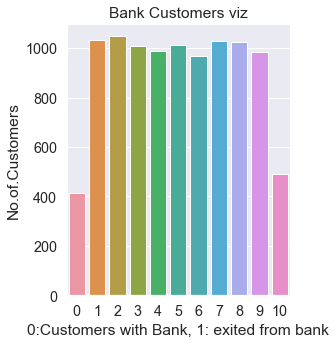

In [ ]:
plt.figure(figsize=(4,5))
sns.countplot(x='Tenure',data=df)
plt.xlabel('0:Customers with Bank, 1: exited from bank')
plt.ylabel('No.of.Customers')
plt.title("Bank Customers viz")
plt.show()

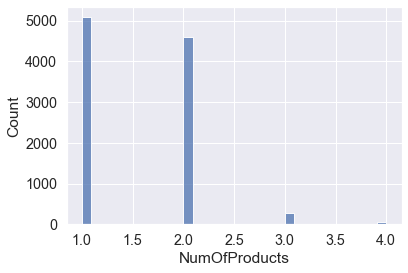

In [ ]:
sns.histplot(x='NumOfProducts', data=df);

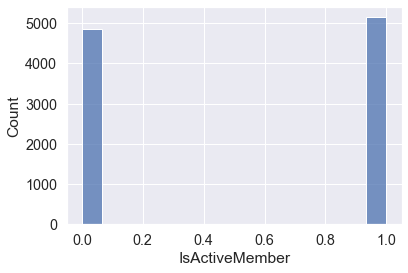

In [ ]:
sns.histplot(x='IsActiveMember', data=df);

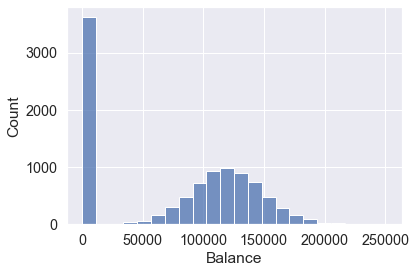

In [ ]:
sns.histplot(x='Balance', data=df);

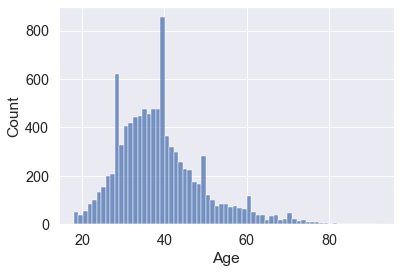

In [ ]:
sns.histplot(df.Age,kde=False);

AxesSubplot(0.125,0.125;0.775x0.755)


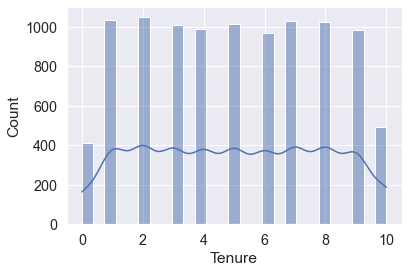

In [ ]:
print(sns.histplot(df.Tenure,kde=True))

AxesSubplot(0.125,0.125;0.775x0.755)


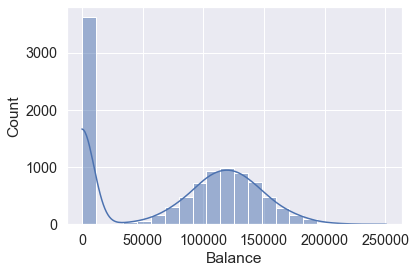

In [ ]:
print(sns.histplot(df.Balance,kde=True))

# 3.2) bi-variate

In [ ]:
#bi variate analysis of continous variables 

In [ ]:
print(df[['Age','Tenure','Balance','NumOfProducts','Gender']].corr())

                    Age    Tenure   Balance  NumOfProducts
Age            1.000000 -0.009997  0.028308      -0.030680
Tenure        -0.009997  1.000000 -0.012254       0.013444
Balance        0.028308 -0.012254  1.000000      -0.304180
NumOfProducts -0.030680  0.013444 -0.304180       1.000000


In [ ]:
#group by
print(df.groupby(by="IsActiveMember").agg('mean')[['Age','Tenure','Balance','NumOfProducts']])

                      Age    Tenure       Balance  NumOfProducts
IsActiveMember                                                  
0               37.997938  5.097340  77134.376863       1.524438
1               39.791497  4.933217  75875.422145       1.535624


In [ ]:
print(df.groupby(by="EstimatedSalary").agg('mean')[['Age','Tenure','Balance','NumOfProducts']])

                  Age  Tenure    Balance  NumOfProducts
EstimatedSalary                                        
11.58            45.0     4.0  122917.71            1.0
90.07            31.0     5.0       0.00            2.0
91.75            59.0     8.0  121669.93            2.0
96.27            38.0     2.0       0.00            2.0
106.67           40.0     9.0       0.00            1.0
...               ...     ...        ...            ...
199909.32        28.0     8.0       0.00            2.0
199929.17        37.0     9.0  178755.84            1.0
199953.33        27.0     4.0  153325.10            1.0
199970.74        41.0     5.0   98635.77            1.0
199992.48        42.0     2.0       0.00            2.0

[9999 rows x 4 columns]


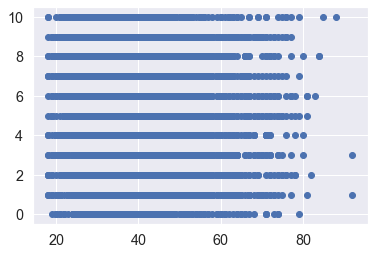

In [ ]:
print(plt.scatter(df.Age,df.Tenure))

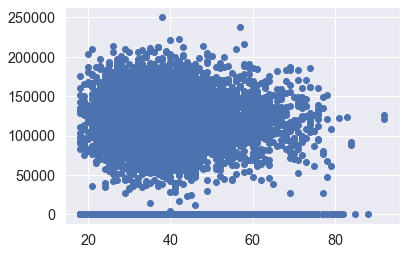

In [ ]:
 print(plt.scatter(df.Age,df.Balance))

In [ ]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
import statsmodels.api as sm

y = df['IsActiveMember']
x = df[['EstimatedSalary']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         IsActiveMember   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.304
Date:                Tue, 27 Sep 2022   Prob (F-statistic):              0.253
Time:                        19:51:26   Log-Likelihood:                -7252.7
No. Observations:               10000   AIC:                         1.451e+04
Df Residuals:                    9998   BIC:                         1.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5250      0.010     

# 3.3) Perform Multivariate Analysis

<Figure size 576x576 with 0 Axes>

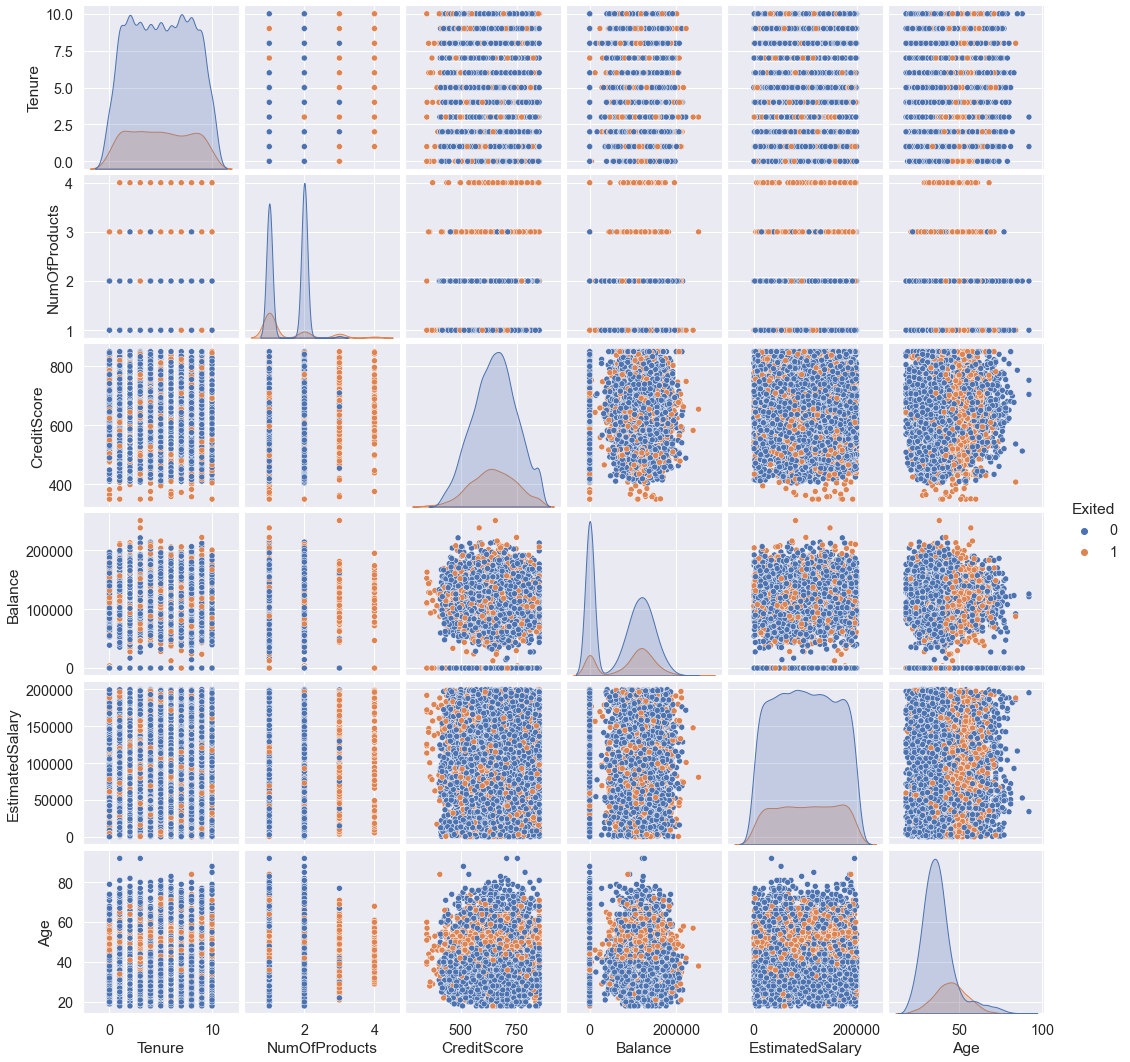

In [ ]:
plt.figure(figsize=(8,8))
print(sns.pairplot(data=df[[ "Tenure","NumOfProducts","CreditScore","Balance","EstimatedSalary","Exited","Age"]],hue="Exited"))

In [ ]:
sns.pairplot(df.corr())

# 4.) Descriptive Statistics

In [ ]:
#descriptive analysis
df=pd.DataFrame(df)
print(df.sum())

RowNumber                                                   50005000
CustomerId                                              156909405694
Surname            HargraveHillOnioBoniMitchellChuBartlettObinnaH...
CreditScore                                                  6505288
Geography          FranceSpainFranceFranceSpainSpainFranceGermany...
Gender             FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa...
Age                                                           389218
Tenure                                                         50128
Balance                                                 764858892.88
NumOfProducts                                                  15302
HasCrCard                                                       7055
IsActiveMember                                                  5151
EstimatedSalary                                        1000902398.81
Exited                                                          2037
dtype: object


In [ ]:
print(df.mode())

      RowNumber  CustomerId Surname  CreditScore Geography Gender   Age  \
0             1    15565701   Smith        850.0    France   Male  37.0   
1             2    15565706     NaN          NaN       NaN    NaN   NaN   
2             3    15565714     NaN          NaN       NaN    NaN   NaN   
3             4    15565779     NaN          NaN       NaN    NaN   NaN   
4             5    15565796     NaN          NaN       NaN    NaN   NaN   
...         ...         ...     ...          ...       ...    ...   ...   
9995       9996    15815628     NaN          NaN       NaN    NaN   NaN   
9996       9997    15815645     NaN          NaN       NaN    NaN   NaN   
9997       9998    15815656     NaN          NaN       NaN    NaN   NaN   
9998       9999    15815660     NaN          NaN       NaN    NaN   NaN   
9999      10000    15815690     NaN          NaN       NaN    NaN   NaN   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2.0      0.0           

In [ ]:
print(df.mean(numeric_only=True))

RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64


In [ ]:
print("----Sum-----")
print(df.sum(1,numeric_only=True))
print("----------------------------------")
print("----------------------------------")
print("-----Product-----")
array = np.array(df.prod(numeric_only=True), dtype=np.float64)
print(array)
print("----------------------------------")
print("----------------------------------")

----Sum-----
0       15737734.88
1       15845495.44
2       15812336.57
3       15796215.63
4       15896200.10
           ...     
9995    15715314.64
9996    15740860.38
9997    15638941.58
9998    15863486.83
9999    15756587.78
Length: 10000, dtype: float64
----------------------------------
----------------------------------
-----Product-----
[0. 0. 0. ... 0. 0. 0.]
----------------------------------
----------------------------------


# 5.)Rows with Missing Values

In [ ]:

print(df.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# Dispersion of data

AxesSubplot(0.125,0.125;0.775x0.755)


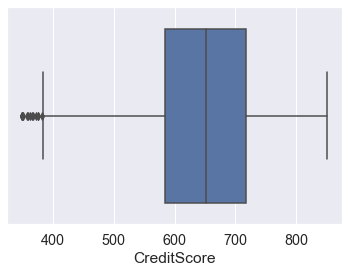

In [ ]:
print(sns.boxplot(x=df['CreditScore']))

AxesSubplot(0.125,0.125;0.775x0.755)


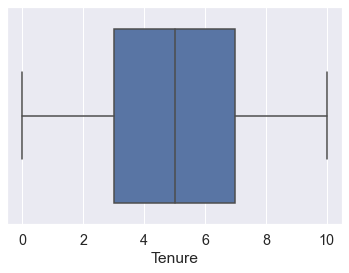

In [ ]:
print(sns.boxplot(x=df['Tenure']))

# Interquartile Range

In [ ]:
q = df.quantile([0.75, 0.25])
print(q)

      RowNumber   CustomerId  CreditScore   Age  Tenure    Balance  \
0.75    7500.25  15753233.75        718.0  44.0     7.0  127644.24   
0.25    2500.75  15628528.25        584.0  32.0     3.0       0.00   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0.75            2.0        1.0             1.0      149388.2475     0.0  
0.25            1.0        0.0             0.0       51002.1100     0.0  


# Standard Deviation

In [ ]:
print(df.std(numeric_only=True))

RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64


# not null

In [ ]:
df.notnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True,True,True,True,True


# 6.)Outliers and handling

<AxesSubplot:xlabel='Age'>

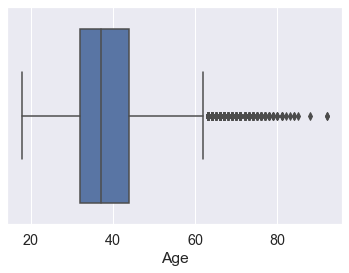

In [ ]:
sns.boxplot(x=df['Age'])

In [ ]:
df['Age'].mean()

38.9218

<AxesSubplot:xlabel='Age'>

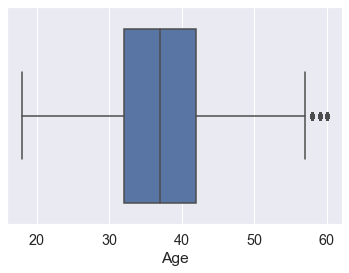

In [ ]:
df['Age'] = np.where(df['Age'] > 60, 39, df['Age']) 
sns.boxplot(x=df['Age'])

<AxesSubplot:xlabel='Balance'>

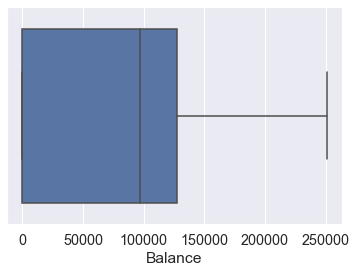

In [ ]:
sns.boxplot(x=df['Balance'])

In [ ]:
df['Balance'].mean()

76485.88928799961

<AxesSubplot:xlabel='Balance'>

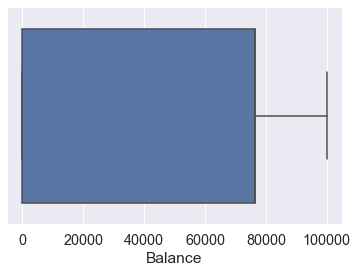

In [ ]:
df['Balance'] = np.where(df['Balance'] > 100000, 76500, df['Balance']) 
sns.boxplot(x=df['Balance'])

# 7.)Check for Categorical columns and perform encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Surname'] = le.fit_transform(df['Surname'])
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,76500.00,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,76500.00,1,1,1,79084.10,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df[["Surname"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

,0,1,2,3,4,5,6,7,8,9,...,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df["Surname"].value_counts()

2473    32
2389    29
1689    29
2751    28
336     26
        ..
1307     1
285      1
288      1
2194     1
363      1
Name: Surname, Length: 2932, dtype: int64

In [ ]:
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [ ]:
df['Gender'].unique()

array([0, 1])

# 8.) Split the data into dependent and independent variables

In [ ]:
print("--------------Dependent Variables-------------------")
print(df.iloc[:, 0:4])


--------------Dependent Variables-------------------
      RowNumber  CustomerId  Surname  CreditScore
0             1    15634602     1115          619
1             2    15647311     1177          608
2             3    15619304     2040          502
3             4    15701354      289          699
4             5    15737888     1822          850
...         ...         ...      ...          ...
9995       9996    15606229     1999          771
9996       9997    15569892     1336          516
9997       9998    15584532     1570          709
9998       9999    15682355     2345          772
9999      10000    15628319     2751          792

[10000 rows x 4 columns]


In [ ]:
print("---------------Independent Variables------------------")
Y=df.iloc[:,4]
print(Y)

---------------Independent Variables------------------
0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int32


# 9.)Scale the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
object= StandardScaler()
# standardization 
scaled = sc.fit_transform(x)
print(scaled)

[[-1.73187761 -0.78321342 -0.46418322 -0.32622142]
 [-1.7315312  -0.60653412 -0.3909112  -0.44003595]
 [-1.73118479 -0.99588476  0.62898807 -1.53679418]
 ...
 [ 1.73118479 -1.47928179  0.07353887  0.60498839]
 [ 1.7315312  -0.11935577  0.98943914  1.25683526]
 [ 1.73187761 -0.87055909  1.4692527   1.46377078]]


In [ ]:
#Split the data into train & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 3, random_state = 6) 
x_train


,RowNumber,CustomerId,Surname,CreditScore
5880,5881,15718231,1062,537
9114,9115,15605737,989,541
1060,1061,15650933,1621,490
1841,1842,15788539,924,501
5105,5106,15718465,2347,671
...,...,...,...,...
9040,9041,15653952,2567,581
8527,8528,15586931,1252,694
4714,4715,15611024,1356,567
8419,8420,15775809,1195,677


In [ ]:
x_test.shape

(3, 4)

In [ ]:
x_test

,RowNumber,CustomerId,Surname,CreditScore
739,740,15705639,2061,692
9426,9427,15675518,454,499
8200,8201,15577359,239,767


In [ ]:
y_train.shape

(9997,)

In [ ]:
y_train

5880    1
9114    0
1060    0
1841    0
5105    0
       ..
9040    1
8527    1
4714    1
8419    1
2761    1
Name: IsActiveMember, Length: 9997, dtype: int64

In [ ]:
y_test.shape

(3,)

In [ ]:
y_test

739     0
9426    0
8200    0
Name: IsActiveMember, dtype: int64